In [53]:
# Librerías para el manejo de datos
import pandas as pd

# Biblioteca para crear nubes de palabras
from wordcloud import WordCloud 

# Librerías para Visualización de datos
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
import seaborn as sns

from IPython.display import clear_output, HTML
from ipywidgets import widgets

# Librería para procesamiento de lenguaje natural(NLP)
import spacy 
 
from translate import Translator

In [54]:
# Leer los datos
df = pd.read_csv('../Ficheros/csv/df_corpus_linguistico.csv', sep='\t', index_col='id')
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,quora_en_es,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,quora_en_es,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",quora_en_es,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",quora_en_es,10,8,neutral,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0
6,!!! You became its next victim when you entere...,¡¡¡!!! Te convertiste en su próxima víctima cu...,quora_en_es,19,19,negativo,3.0,3.0,2.0,2.0,...,3.0,3.0,1.0,0.0,5.0,4.0,0.0,2.0,4.0,7.0


In [55]:
# Longitud del dataset
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset tiene 10068314 filas y 26 columnas


In [56]:
# Columnas del dataset
df.columns

Index(['source', 'target', 'file_name', 'quantity_words_source',
       'quantity_words_target', 'sentiment', 'NOUN_source', 'NOUN_target',
       'ADJ_source', 'ADJ_target', 'DET_source', 'DET_target', 'ADV_source',
       'ADV_target', 'CCONJ_source', 'CCONJ_target', 'VERB_source',
       'VERB_target', 'VAUX_source', 'VAUX_target', 'PRON_source',
       'PRON_target', 'ADP_source', 'ADP_target', 'PUNCT_source',
       'PUNCT_target'],
      dtype='object')

In [57]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10068314 entries, 1 to 12148000
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   source                 object 
 1   target                 object 
 2   file_name              object 
 3   quantity_words_source  int64  
 4   quantity_words_target  int64  
 5   sentiment              object 
 6   NOUN_source            float64
 7   NOUN_target            float64
 8   ADJ_source             float64
 9   ADJ_target             float64
 10  DET_source             float64
 11  DET_target             float64
 12  ADV_source             float64
 13  ADV_target             float64
 14  CCONJ_source           float64
 15  CCONJ_target           float64
 16  VERB_source            float64
 17  VERB_target            float64
 18  VAUX_source            float64
 19  VAUX_target            float64
 20  PRON_source            float64
 21  PRON_target            float64
 22  ADP_source      

# Ánalisis de cada variable

### Variables categóricas

In [58]:
# Definir en una variable todas las columnas categóricas
col_categorical = ['file_name', 'sentiment']

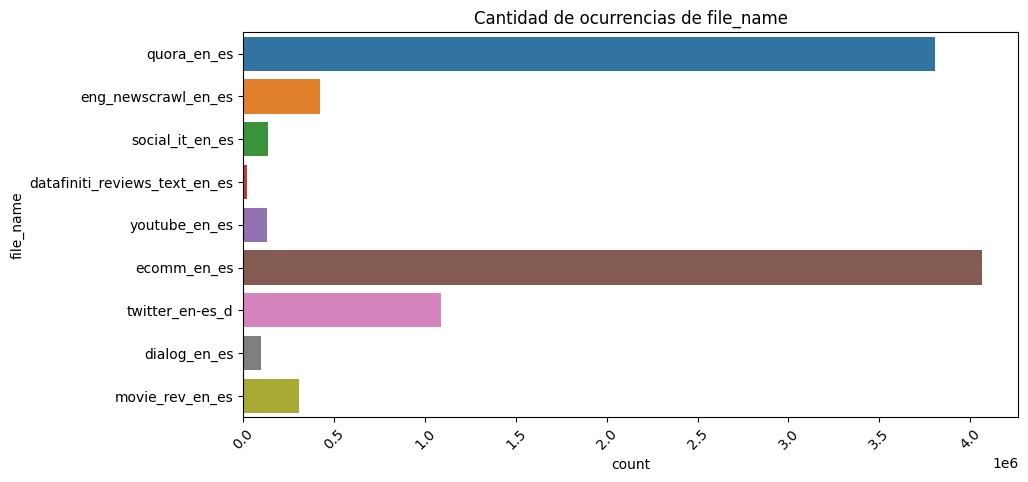

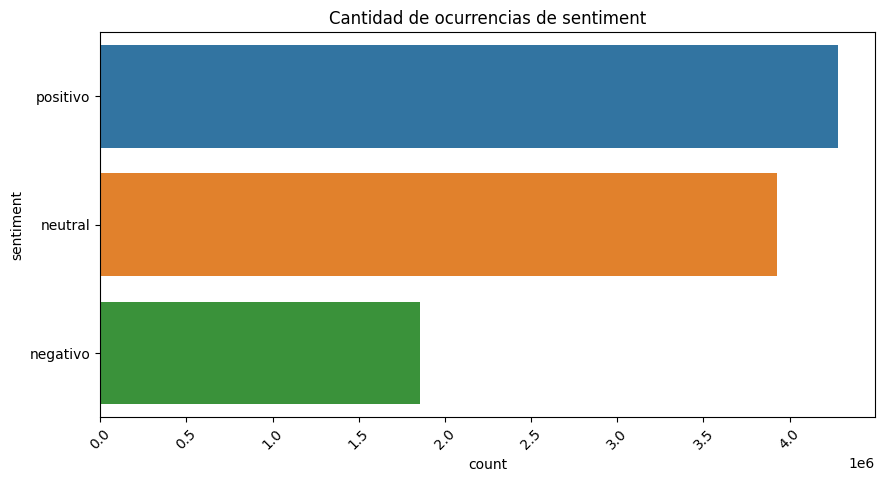

In [7]:
# Gráfica de barras para las columnas categóricas
for col in col_categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col)  
    plt.title(f'Cantidad de ocurrencias de {col}')
    plt.xticks(rotation=45)
plt.show()


In [10]:
# Cantidad de observaciones por file_name
cant_file_name = df['file_name'].value_counts()

cant_file_name = cant_file_name.sort_values(ascending=False)
cant_file_name

ecomm_en_es                      4063038
quora_en_es                      3808771
twitter_en-es_d                  1086581
eng_newscrawl_en_es               420805
movie_rev_en_es                   304369
social_it_en_es                   136501
youtube_en_es                     130231
dialog_en_es                       98826
datafiniti_reviews_text_en_es      19192
Name: file_name, dtype: int64

In [11]:
# Cantidad de observaciones por file_name
cant_sentiment = df['sentiment'].value_counts()

cant_sentiment = cant_sentiment.sort_values(ascending=False)
cant_sentiment

positivo    4282114
neutral     3927736
negativo    1858464
Name: sentiment, dtype: int64

**Observaciones**
1. Se cuenta con 9 fuentes de datos (file_name)
2. La fuente de datos con mayor cantidad de registros es 'ecomm' con 4 063 038 observaciones
3. Hay 3 clases de sentimientos: positivo, negativo y neutro.
4. La clase de sentimiento con mayor cantidad de registros en este dataset es 'positivo', con 4 282 114 observaciones.

### Variables numéricas

In [12]:
col_words = ['quantity_words_source', 'quantity_words_target']

In [13]:
# Análisis estadístico de la cantidad de palabras en el source y target
df[col_words].describe()

,quantity_words_source,quantity_words_target
count,1.006831e+07,1.006831e+07
mean,1.311098e+01,1.365304e+01
std,6.729159e+00,7.340310e+00
min,2.000000e+00,1.000000e+00
25%,8.000000e+00,8.000000e+00
50%,1.200000e+01,1.200000e+01
75%,1.700000e+01,1.800000e+01
max,3.100000e+02,3.490000e+02


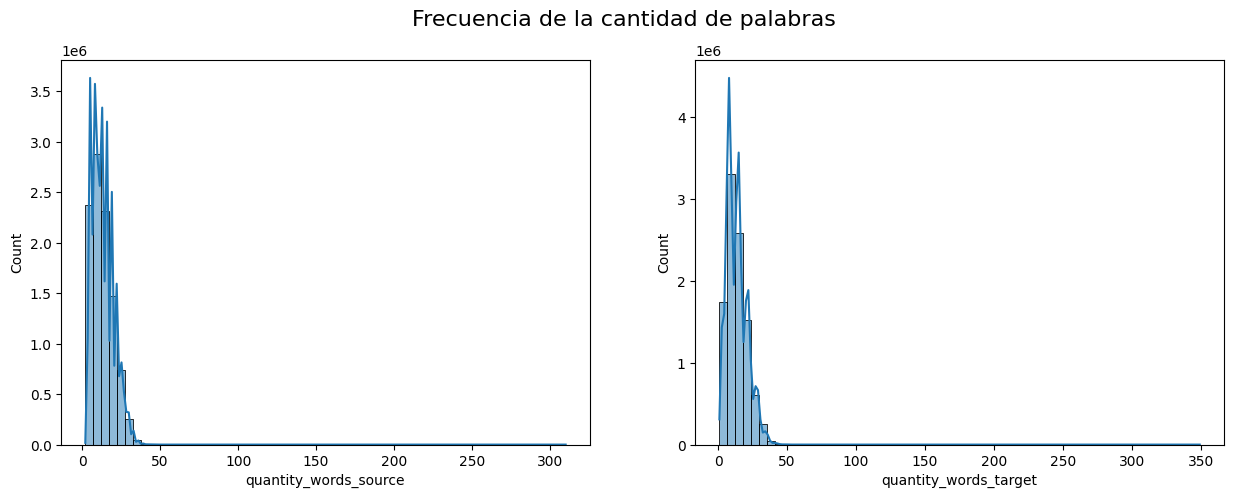

In [14]:
# Histogramas para las columnas numéricas 'col_words'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5) 
# Título de la gráfica
plt.suptitle('Frecuencia de la cantidad de palabras', fontsize=16)
for i in range(len(col_words)):
    sns.histplot(x=col_words[i], data=df, ax = ax[i], kde = True, bins= 60) 
    
plt.show()

In [15]:
print(f'La cantidad de palabras en el source tiene una media de {df["quantity_words_source"].mean()} y una desviación estándar de {df["quantity_words_source"].std()}')
print(f'La cantidad de palabras en el target tiene una media de {df["quantity_words_target"].mean()} y una desviación estándar de {df["quantity_words_target"].std()}')

La cantidad de palabras en el source tiene una media de 13.110976971914067 y una desviación estándar de 6.729159440318055
La cantidad de palabras en el target tiene una media de 13.653043895929349 y una desviación estándar de 7.340310408431339


In [16]:
# Total de observaciones
df.shape[0]

10068314

**Observaciones**<br><br>
De un total de 10 068 314 observaciones:
- La media de palabras (promedio) en el "source" es de 13.11, lo que significa que, en promedio, hay aproximadamente 13.11 palabras por frases en la fuente de los datos.
- La media de palabras(promedio) en el "target" es de 13.65, lo que indica que, en promedio, hay aproximadamente 13.65 palabras por frases en el destino de los datos.
- La desviación estándar en el "source" es de aproximadamente 6.73, lo que significa que los datos en la fuente tienen una dispersión promedio de alrededor de 6.73 unidades con respecto a la media de palabras.
- La desviación estándar en el "target" es de aproximadamente 7.34, lo que indica que los datos en el destino tienen una dispersión promedio de alrededor de 7.34 unidades con respecto a la media de palabras.

In [17]:
col_nlp = ['NOUN_source', 'NOUN_target', 
               'ADJ_source', 'ADJ_target', 'DET_source', 'DET_target', 'ADV_source', 'ADV_target',
                'CCONJ_source', 'CCONJ_target','VERB_source', 'VERB_target', 'VAUX_source', 'VAUX_target',
                'PRON_source', 'PRON_target','ADP_source', 'ADP_target']

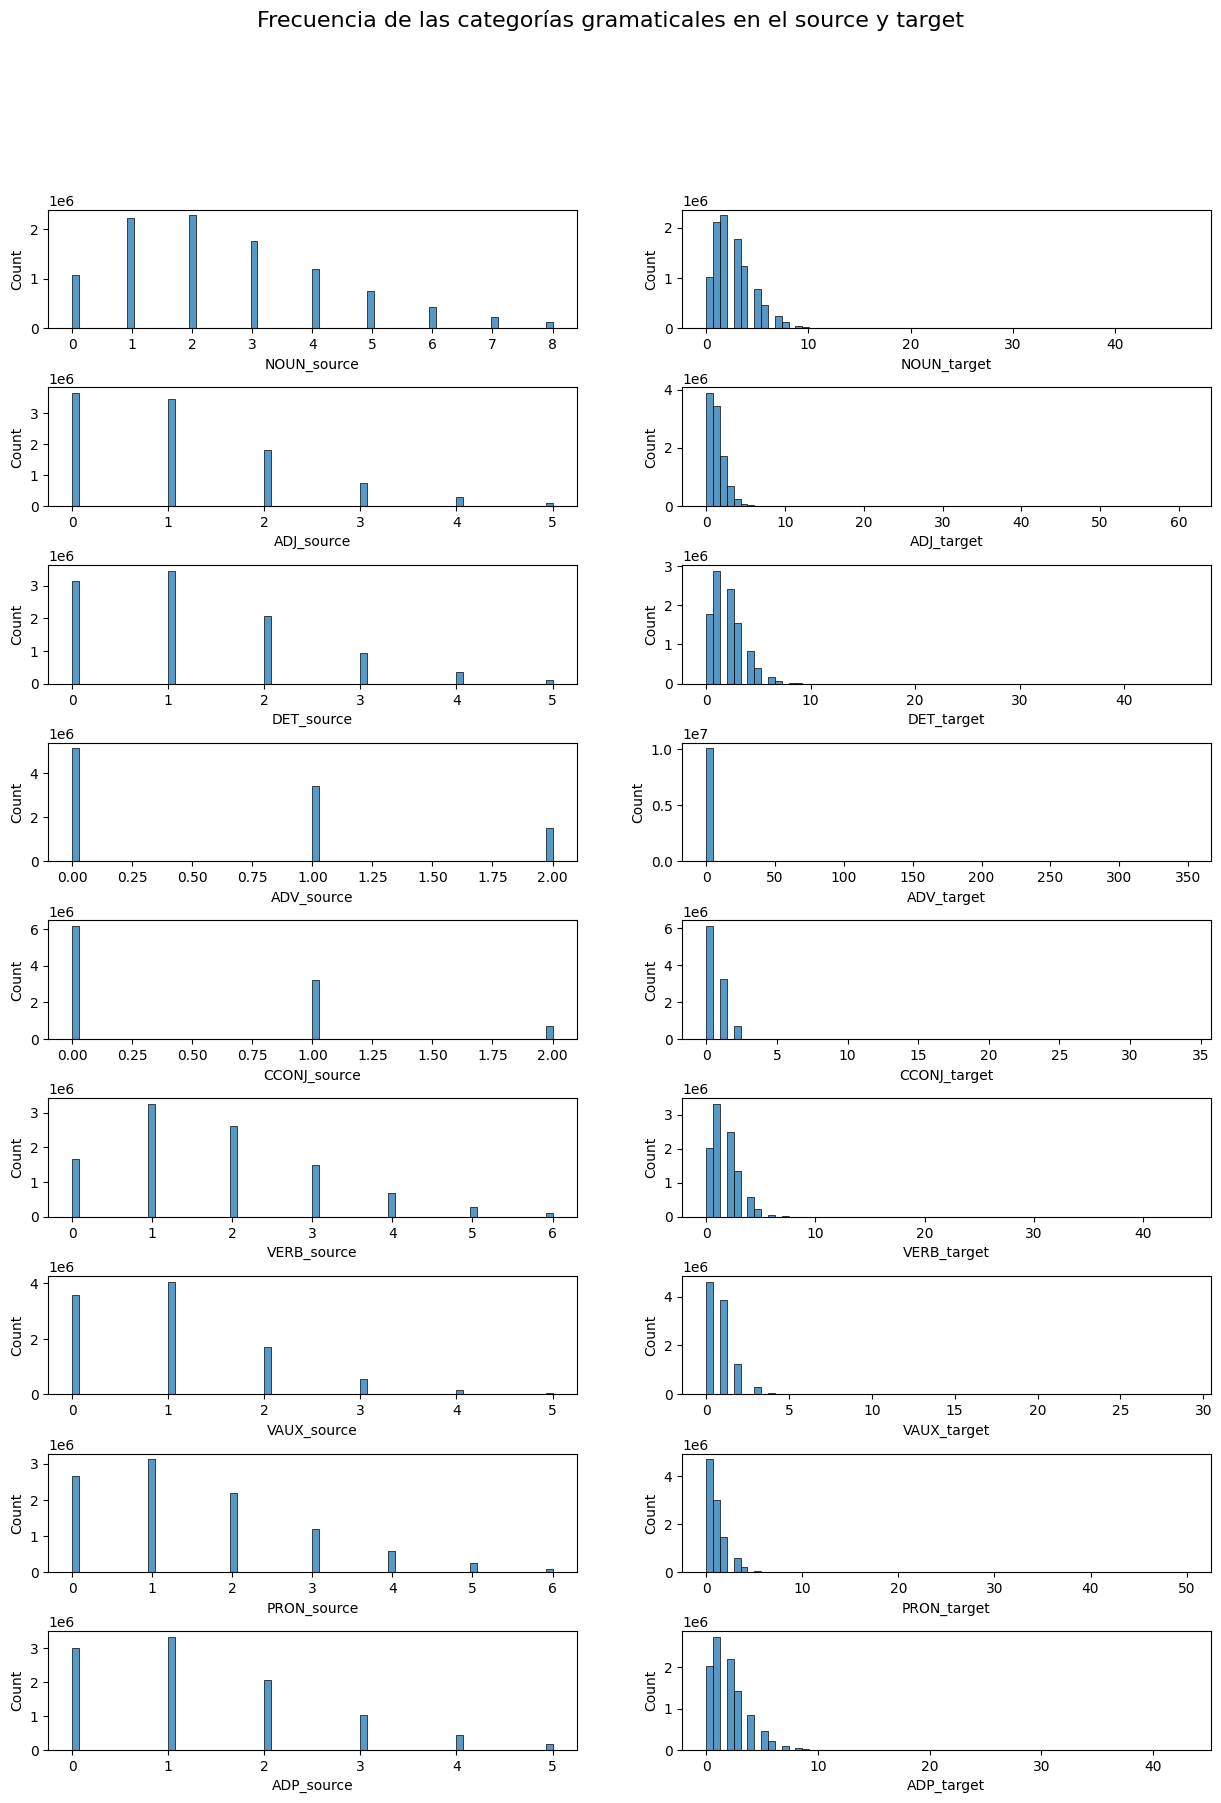

In [18]:
# Histogramas para las columnas numéricas 'col_words'

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(15,20)) 
# Título de la gráfica
plt.suptitle('Frecuencia de las categorías gramaticales en el source y target', fontsize=16)

for i in range(len(col_nlp)):
    sns.histplot(x=col_nlp[i], data=df, ax=ax[i//2, i%2], bins=70)    
    ax[i//2, i%2].set_xlabel(col_nlp[i])
    # Espacio entre las gráficas
    plt.subplots_adjust(hspace=0.5)
    

plt.show()

In [19]:
# Análisis estadístico de las columnas NOUN_source y NOUN_target
df[col_nlp].describe()

,NOUN_source,NOUN_target,ADJ_source,ADJ_target,DET_source,DET_target,ADV_source,ADV_target,CCONJ_source,CCONJ_target,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target
count,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07,1.006831e+07
mean,2.559564e+00,2.673771e+00,1.084186e+00,1.030424e+00,1.223570e+00,1.906181e+00,6.409416e-01,8.204578e-01,4.575781e-01,4.660965e-01,1.750579e+00,1.607105e+00,9.776913e-01,7.437671e-01,1.507819e+00,8.922156e-01,1.305088e+00,1.937491e+00
std,1.830049e+00,1.925386e+00,1.108595e+00,1.096381e+00,1.150018e+00,1.514519e+00,7.295430e-01,9.302875e-01,6.219523e-01,6.330272e-01,1.321753e+00,1.287793e+00,9.590207e-01,8.374473e-01,1.354885e+00,1.090325e+00,1.214580e+00,1.670507e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
75%,4.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
max,8.000000e+00,4.700000e+01,5.000000e+00,6.100000e+01,5.000000e+00,4.600000e+01,2.000000e+00,3.490000e+02,2.000000e+00,3.400000e+01,6.000000e+00,4.400000e+01,5.000000e+00,2.900000e+01,6.000000e+00,5.000000e+01,5.000000e+00,4.300000e+01


In [20]:
print("---Sustantivos---")
print(f'Source: tiene una media de {df["NOUN_source"].mean()} y una desviación estándar de {df["NOUN_source"].std()}')
print(f'Target: tiene una media de {df["NOUN_target"].mean()} y una desviación estándar de {df["NOUN_target"].std()}')

print("---Adjetivos---")
print(f'Source: tiene una media de {df["ADJ_source"].mean()} y una desviación estándar de {df["ADJ_source"].std()}')
print(f'Target: tiene una media de {df["ADJ_target"].mean()} y una desviación estándar de {df["ADJ_target"].std()}')

print("---Determinantes---")
print(f'Source: tiene una media de {df["DET_source"].mean()} y una desviación estándar de {df["DET_source"].std()}')
print(f'Target: tiene una media de {df["DET_target"].mean()} y una desviación estándar de {df["DET_target"].std()}')

print("---Adverbios---")
print(f'Source: tiene una media de {df["ADV_source"].mean()} y una desviación estándar de {df["ADV_source"].std()}')
print(f'Target: tiene una media de {df["ADV_target"].mean()} y una desviación estándar de {df["ADV_target"].std()}')

print("---Conjunciones---")
print(f'Source: tiene una media de {df["CCONJ_source"].mean()} y una desviación estándar de {df["CCONJ_source"].std()}')
print(f'Target: tiene una media de {df["CCONJ_target"].mean()} y una desviación estándar de {df["CCONJ_target"].std()}')

print("---Verbos---")
print(f'Source: tiene una media de {df["VERB_source"].mean()} y una desviación estándar de {df["VERB_source"].std()}')
print(f'Target: tiene una media de {df["VERB_target"].mean()} y una desviación estándar de {df["VERB_target"].std()}')

print("---Verbos auxiliares---")
print(f'Source: tiene una media de {df["VAUX_source"].mean()} y una desviación estándar de {df["VAUX_source"].std()}')
print(f'Target: tiene una media de {df["VAUX_target"].mean()} y una desviación estándar de {df["VAUX_target"].std()}')

print("---Pronombres---")
print(f'Source: tiene una media de {df["PRON_source"].mean()} y una desviación estándar de {df["PRON_source"].std()}')
print(f'Target: tiene una media de {df["PRON_target"].mean()} y una desviación estándar de {df["PRON_target"].std()}')

print("---Preposiciones---")
print(f'Source: tiene una media de {df["ADP_source"].mean()} y una desviación estándar de {df["ADP_source"].std()}')
print(f'Target: tiene una media de {df["ADP_target"].mean()} y una desviación estándar de {df["ADP_target"].std()}')


---Sustantivos---
Source: tiene una media de 2.5595644911352586 y una desviación estándar de 1.8300490477500007
Target: tiene una media de 2.6737707028207502 y una desviación estándar de 1.9253860185858431
---Adjetivos---
Source: tiene una media de 1.0841857931725212 y una desviación estándar de 1.1085948260437388
Target: tiene una media de 1.030424160390707 y una desviación estándar de 1.096380898960814
---Determinantes---
Source: tiene una media de 1.2235701031970199 y una desviación estándar de 1.1500183772691814
Target: tiene una media de 1.9061812136570233 y una desviación estándar de 1.5145188649864934
---Adverbios---
Source: tiene una media de 0.6409415717467691 y una desviación estándar de 0.7295429923491508
Target: tiene una media de 0.8204578244182691 y una desviación estándar de 0.9302875089128685
---Conjunciones---
Source: tiene una media de 0.45757810096109436 y una desviación estándar de 0.6219522678824634
Target: tiene una media de 0.46609650831310984 y una desviación es

**Resumen**<br><br>
Se observan diferencias en la media y desviación estándar entre el source y el target para las diferentes categorías gramaticales.
- media: promedio de la cantidad de palabras de acuerdo a la categoría existente en el source y target
- desviación estándar: variabilidad de la cantidad de palabras en el source y target con respecto a la media

In [21]:
col_PUNCT = ['PUNCT_source', 'PUNCT_target']

In [22]:
# Análisis estadístico de la cantidad de palabras en el source y target
df[col_PUNCT].describe()

,PUNCT_source,PUNCT_target
count,1.006831e+07,1.006831e+07
mean,1.775408e+00,1.884837e+00
std,1.252551e+00,1.363995e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,2.000000e+00
75%,2.000000e+00,2.000000e+00
max,6.000000e+00,1.080000e+02


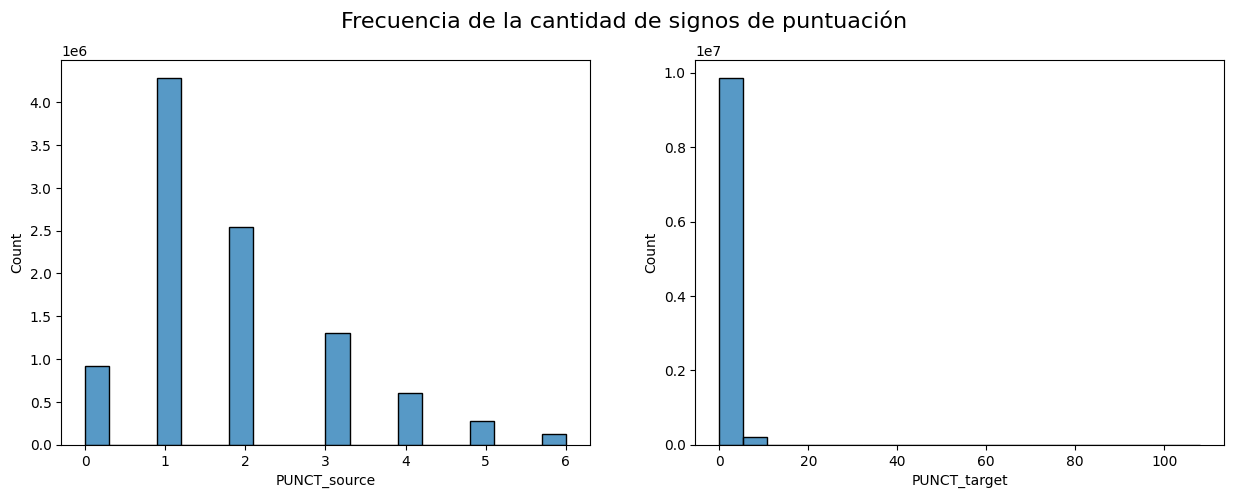

In [23]:
# Histogramas para las columnas numéricas 'col_words'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5) 
# Título de la gráfica
plt.suptitle('Frecuencia de la cantidad de signos de puntuación', fontsize=16)
for i in range(len(col_PUNCT)):
    sns.histplot(x=col_PUNCT[i], data=df, ax = ax[i], bins= 20)
    
plt.show()

In [24]:
print(f'La cantidad de signos de puntuación en el source tiene una media de: {df["PUNCT_source"].mean()} y una desviación estándar de: {df["PUNCT_source"].std()}')
print(f'La cantidad de signos de puntuación en el target tiene una media de: {df["PUNCT_target"].mean()} y una desviación estándar de: {df["PUNCT_target"].std()}')

La cantidad de signos de puntuación en el source tiene una media de: 1.7754082759039895 y una desviación estándar de: 1.252551256470939
La cantidad de signos de puntuación en el target tiene una media de: 1.8848368257088526 y una desviación estándar de: 1.3639945151454353


**Observaciones:** <br><br>
1. Para el "source": <br>
- La media de la cantidad de signos de puntuación es aproximadamente 1.78, lo que indica que en promedio hay alrededor de 1.77 signos de puntuación en cada frase del "source". 
- La desviación estándar es aproximadamente 1.25, lo que indica que la cantidad de signos de puntuación varía en promedio alrededor de 1.25 unidades con respecto a la media en el "source".<br><br>
2. Para el "target": <br>
- La media de la cantidad de signos de puntuación es aproximadamente 1.88, lo que indica que en promedio hay alrededor de 1.88 signos de puntuación en cada frase del "target". 
- La desviación estándar es aproximadamente 1.36, lo que indica que la cantidad de signos de puntuación varía en promedio alrededor de 1.36 unidades con respecto a la media en el "target". <br><br>

**En resumen:** <br>
Se observa que la cantidad de signos de puntuación en el "source" y el "target" tienen medias y desviaciones estándar ligeramente diferentes, lo que indica que pueden haber diferencias en la cantidad de signos de puntuación entre ambos conjuntos de datos.

## Palabras más frecuentes en el source y target

In [25]:
# Wordcloud de las palabras más frecuentes en el source
wordcloud_source = WordCloud(width = 800, height = 800,   
                      background_color ='white',
                      min_font_size = 10).generate(str(df['source']))     # Genera el wordcloud con las palabras del source 
                

In [26]:
# Wordcloud de las palabras más frecuentes en el target
wordcloud_target = WordCloud(width = 800, height = 800,   
                      background_color ='white',
                      min_font_size = 10).generate(str(df['target']))     # Genera el wordcloud con las palabras del source 
                

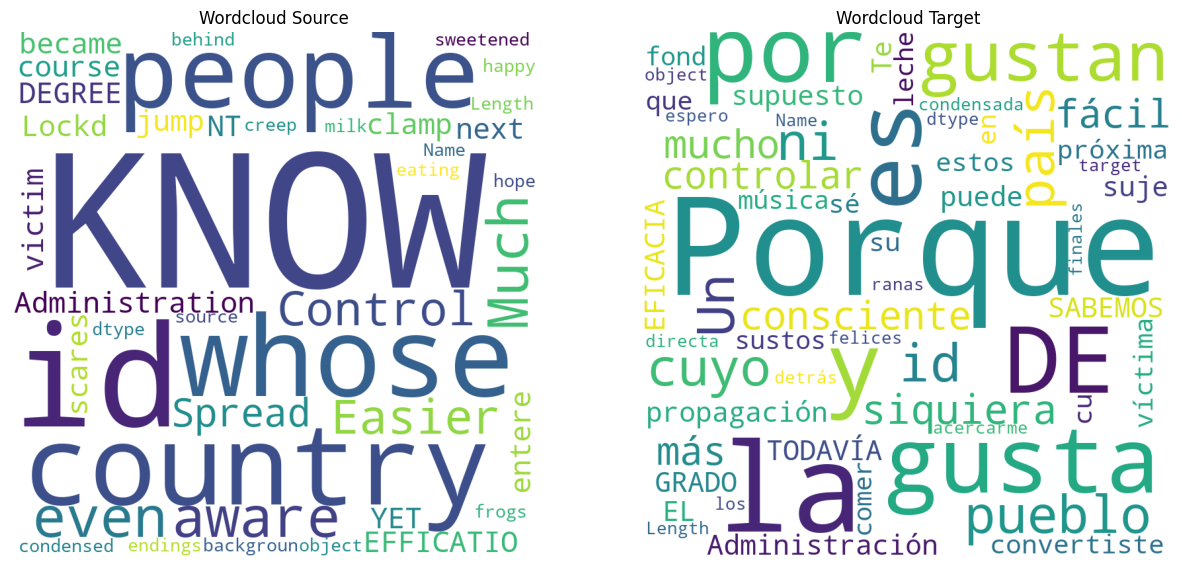

In [27]:
# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Wordcloud del source en el primer subplot
axes[0].imshow(wordcloud_source)
axes[0].axis('off')
axes[0].set_title('Wordcloud Source')

# Wordcloud del target en el segundo subplot
axes[1].imshow(wordcloud_target)
axes[1].axis('off')
axes[1].set_title('Wordcloud Target')

plt.show()

#### Top de palabras en el source y target

In [28]:
# Extrae las palabras del wordcloud
words_source = wordcloud_source.words_      # Diccionario con las palabras del source y su frecuencia de aparición en el texto 
words_target = wordcloud_target.words_     # Diccionario con las palabras del target y su frecuencia de aparición en el texto

In [29]:
# Ordena las palabras por frecuencia de aparición
words_source_sorted = sorted(words_source.items(), key=lambda x: x[1], reverse=True)    # items() devuelve una lista de tuplas con las palabras y su frecuencia de aparición
words_target_sorted = sorted(words_target.items(), key=lambda x: x[1], reverse=True)    # key : parámetro opcional que permite especificar una función

In [30]:
# Selecciona las 10 palabras más frecuentes
top_10_source = words_source_sorted[:10]
top_10_target = words_target_sorted[:10]

In [31]:
top_10_source

[('KNOW', 1.0),
 ('id', 0.5),
 ('country', 0.5),
 ('whose', 0.5),
 ('people', 0.5),
 ('even', 0.5),
 ('aware', 0.5),
 ('Much', 0.5),
 ('Easier', 0.5),
 ('Control', 0.5)]

In [32]:
# Traduce las palabras del source al español y las guarda en la nueva lista de tuplas 

top_10_source_es = []

# Traduce las palabras del source al español y las guarda en la nueva lista de tuplas
for word_tuple in top_10_source:
    word = word_tuple[0]
    translator = Translator(to_lang="es")       # Traductor de la librería googletrans 
    word_es = translator.translate(word)        # Traduce la palabra al español
    word_tuple_es = (word_es, word_tuple[1])
    top_10_source_es.append(word_tuple_es)

In [33]:
top_10_source_es

[('CONOCER', 1.0),
 ('ID', 0.5),
 ('country-467', 0.5),
 ('cuyo', 0.5),
 ('personas', 0.5),
 ('incluso', 0.5),
 ('consciente', 0.5),
 ('Muchas', 0.5),
 ('Más fácil', 0.5),
 ('Control', 0.5)]

In [34]:
top_10_target

[('Porque', 1.0),
 ('la', 0.8),
 ('es', 0.4),
 ('por', 0.4),
 ('DE', 0.4),
 ('y', 0.4),
 ('gusta', 0.4),
 ('gustan', 0.4),
 ('id', 0.2),
 ('Un', 0.2)]

En el top 10 son las mismas palabras que están en el source y target?

Text(0, 0.5, 'Tarjet')

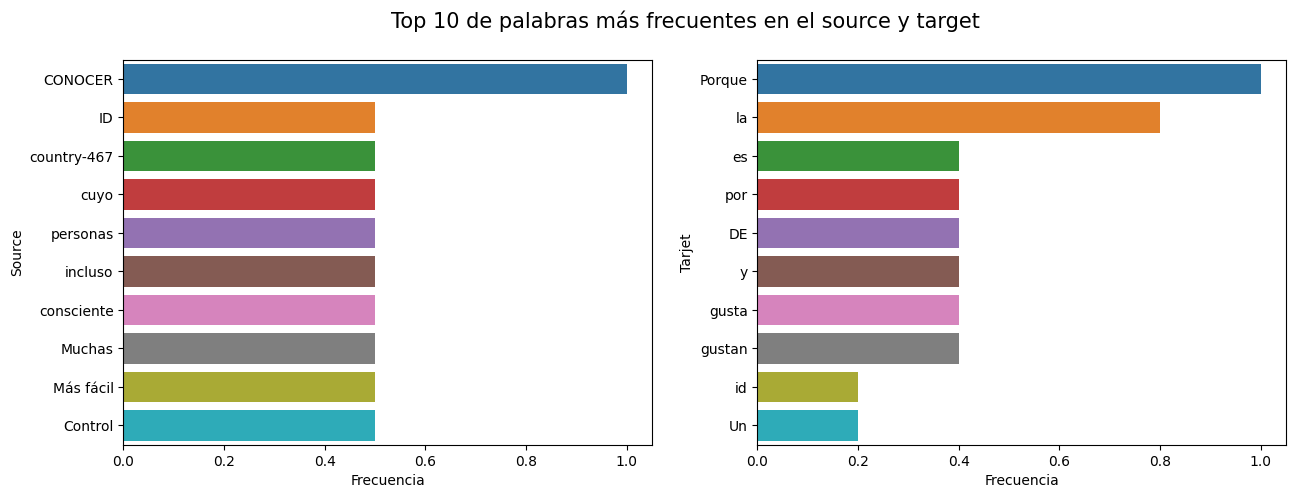

In [35]:
# Grafica las 10 palabras más frecuentes en el source y target
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Top 10 de palabras más frecuentes en el source y target', fontsize=15)
for i in range(len(top_10_source)):
    sns.barplot(y=[word[0] for word in top_10_source_es], x=[word[1] for word in top_10_source_es], ax=ax[0])   # barplot() grafica un gráfico de barras
    sns.barplot(y=[word[0] for word in top_10_target], x=[word[1] for word in top_10_target], ax=ax[1])
# Nombre de los ejes
ax[0].set_xlabel('Frecuencia')
ax[1].set_xlabel('Frecuencia')
ax[0].set_ylabel('Source')
ax[1].set_ylabel('Tarjet')
    

**Observaciones** <br> <br>
En este conjunto de datos en el top 10 de palabras solo se repite "id" en ambos idiomas y no tienen la misma frecuencia de aparición

In [36]:
# Columnas del dataset
df.columns

Index(['source', 'target', 'file_name', 'quantity_words_source',
       'quantity_words_target', 'sentiment', 'NOUN_source', 'NOUN_target',
       'ADJ_source', 'ADJ_target', 'DET_source', 'DET_target', 'ADV_source',
       'ADV_target', 'CCONJ_source', 'CCONJ_target', 'VERB_source',
       'VERB_target', 'VAUX_source', 'VAUX_target', 'PRON_source',
       'PRON_target', 'ADP_source', 'ADP_target', 'PUNCT_source',
       'PUNCT_target'],
      dtype='object')

In [37]:
print(f'El vocabulario del source tiene {df["quantity_words_source"].sum()} palabras')
print(f'El vocabulario del target tiene {df["quantity_words_target"].sum()} palabras')

El vocabulario del source tiene 132005433 palabras
El vocabulario del target tiene 137463133 palabras


### Porcentaje de total de palabras en el source y target

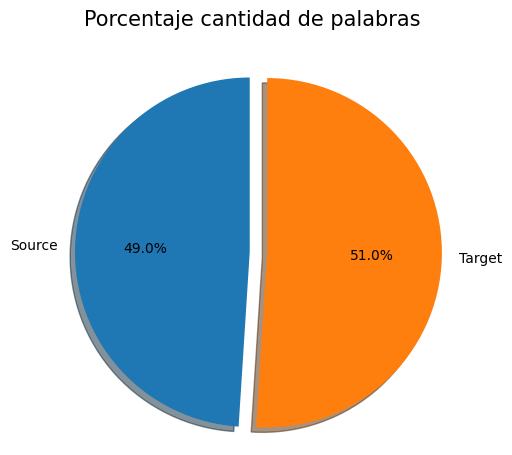

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.suptitle('Porcentaje cantidad de palabras', fontsize=15)
labels = ['Source', 'Target']
sizes = [df["quantity_words_source"].sum(), df["quantity_words_target"].sum()]
explode = (0.1, 0)                                                                              # explode: separación entre las porciones
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)    # autopct : formato de la etiqueta con el porcentaje de cada porción
                                                                                                # shadow : sombra
                                                                                                # startangle : ángulo de inicio del gráfico
ax.axis('equal')                                                                                # axis('equal') : gráfico circular  
plt.show()  

**Observaciones:**
- Con esta representación se puede observar que el vocabulario del target es mayor al del source.
- Se utilizan más palabras en el idioma español que en el inglés.

### Representación de la cantidad de palabras por las diferentes categorías gramaticales

In [39]:
# Lista de categorías gramaticales
categories = ["NOUN", "ADJ", "DET", "ADV", "CCONJ", "VERB", "VAUX", "PRON", "ADP", "PUNCT"]

# Crear una figura vacía
fig = go.Figure()

# Iterar sobre las categorías gramaticales y crear los trazos
for category in categories:
    sum_source = df[f"{category}_source"].sum()
    sum_target = df[f"{category}_target"].sum()
    trace1 = go.Bar(y=[sum_source], x=[f"{category}_source"], name=f"{category}_source", orientation='v', 
                    text=[str(sum_source)], textposition='outside', 
                    marker=dict(color='#2471A3')) 
    trace2 = go.Bar(y=[sum_target], x=[f"{category}_target"], name=f"{category}_target", orientation='v', 
                    text=[str(sum_target)], textposition='outside', 
                    marker=dict(color='#CA6F1E'))
    fig.add_traces([trace1, trace2])

# Actualizar el diseño de la figura
fig.update_layout(
    title="Total de palabras por categorías gramaticales",
    xaxis_title="Categoría gramatical",
    yaxis_title="Total",
    #legend=dict(title="Grupo"),
    #barmode='group'
)

# Mostrar la figura
fig.show()

**Observaciones:**
1. El gráfico de barras muestra la cantidad de palabras por categoría gramatical en el corpus de origen y en el corpus de destino.
2. En todas las categorías gramaticales se nota una diferencia entre el corpus de origen y el corpus de destino.
3. Categorías donde el source es mayor que el target: ADJ, VERB, VAUX, PRON
4. Categorías donde el target es mayor que el source: NOUN, DET, ADV, CCONJ, ADP, PUNCT

### Ratio de las variables categóricas 

In [40]:
# Lista de categorías gramaticales
categories = ["quantity_words","NOUN", "ADJ", "DET", "ADV", "CCONJ", "VERB", "VAUX", "PRON", "ADP", "PUNCT"]
list_ratio = []
for category in categories:
    sum_source = df[f"{category}_source"].sum()
    sum_target = df[f"{category}_target"].sum()
   
    # Calcula el ratio de aparición de la categoría gramatical en el source y target
    ratio = sum_source / sum_target

    # Guarda en una lista de tuplas la categoría gramatical y su frecuencia de aparición
    category_source = (category, sum_source, sum_target, ratio)
    list_ratio.append(category_source)
    

In [41]:
list_ratio

[('quantity_words', 132005433, 137463133, 0.9602969910485017),
 ('NOUN', 25770499.0, 26920363.0, 0.9572864600674218),
 ('ADJ', 10915923.0, 10374634.0, 1.0521742742924713),
 ('DET', 12319288.0, 19192031.0, 0.6418960036069137),
 ('ADV', 6453201.0, 8260627.0, 0.7811999016539544),
 ('CCONJ', 4607040.0, 4692806.0, 0.9817239408575594),
 ('VERB', 17625376.0, 16180833.0, 1.0892749464752525),
 ('VAUX', 9843703.0, 7488481.0, 1.3145126494946038),
 ('PRON', 15181192.0, 8983107.0, 1.689971187029165),
 ('ADP', 13140039.0, 19507272.0, 0.6735969539974631),
 ('PUNCT', 17875368.0, 18977129.0, 0.9419426932282539)]

**Observaciones**<br><br>
Al calcular el ratio de aparición de las categorías gramaticales en el source y target de acuerdo al conjunto de datos obtenido nos podemos dar cuenta que:
- Hay más palabras en la traducción al español que en el source: Un 96% más de palabras en el target que en el source
- Hay más sustantivos en la traducción al español que en el source: Un 95% más de sustantivos en el target que en el source
- Hay más adjetivos en las frases en inglés que en el target: un 5% más de adjetivos en el source que en el target
- Hay más determinantes en las frases en target que en el source: un 64% más de determinantes en el target que en el source

En resumen podemos decir que las frases en inglés son más cortas que las traducciones al español, de acuerdo al conjunto de datos obtenidos. <br><br>
*En general existe diferencias entre ambos idiomas.*

In [59]:
import plotly.express as py
# Crear un dataframe de pandas con los datos
df_ratio = pd.DataFrame(list_ratio, columns=['Variables categóricas', 'T_Source', 'T_Target', 'Ratio'])

# Crear el gráfico de línea con Plotly
fig = py.line(df_ratio, x='Variables categóricas', y='Ratio', markers=True)
fig.update_xaxes(tickangle=45)  # Rotar los nombres de las partes del discurso en el eje x
fig.update_layout(title='Ratio entre Variables Categóricas Source/Target',
                  xaxis_title='Variables Categóricas',
                  yaxis_title='Ratio')
fig.show()

**Observaciones:**
- En el gráfico de línea se utilizó  marcadores circulares para representar los ratios de las variables categóricas entre el source y el target de las diferentes frases del conjunto de datos. 
- El eje x muestra las variables categóricas presentes en el datset, mientras que el eje y muestra los ratios. 
- Las líneas conectan los puntos de datos, lo que permite visualizar las tendencias y variaciones en los ratios a lo largo de las diferentes categorías. 
- El uso de marcadores circulares ayuda a destacar los puntos de datos en el gráfico. 

### ÁNALISIS ADICIONAL. 

In [43]:
df['file_name'].unique()

array(['quora_en_es', 'eng_newscrawl_en_es', 'social_it_en_es',
       'datafiniti_reviews_text_en_es', 'youtube_en_es', 'ecomm_en_es',
       'twitter_en-es_d', 'dialog_en_es', 'movie_rev_en_es'], dtype=object)

### Cambio del lenguaje al comparar por las diferentes fuentes

¿ En qué fuente se utiliza más signos de puntuación?

In [44]:
# Agrupa los datos por file_name y calcula el promedio de punct_source
df_punct = df.groupby('file_name')[['PUNCT_source']].mean()
# Ordena los datos de forma descendente
df_punct = df_punct.sort_values(by='PUNCT_source', ascending=False)
df_punct

,PUNCT_source
file_name,
eng_newscrawl_en_es,2.249125
ecomm_en_es,2.038821
movie_rev_en_es,2.019808
social_it_en_es,1.733079
quora_en_es,1.566781
datafiniti_reviews_text_en_es,1.437057
twitter_en-es_d,1.385100
youtube_en_es,1.348151
dialog_en_es,1.195040


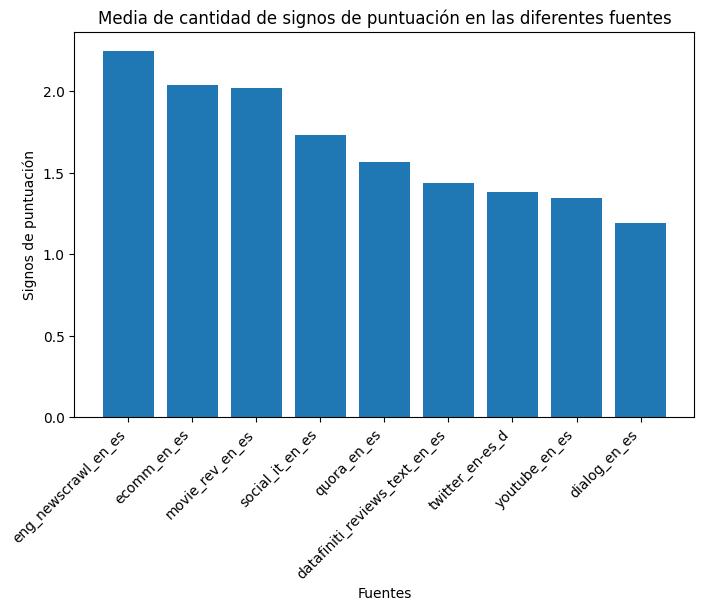

In [45]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Media de cantidad de signos de puntuación en las diferentes fuentes')
ax.set_xlabel('Fuentes')
ax.set_ylabel('Signos de puntuación')
ax.bar(df_punct.index, df_punct['PUNCT_source'])

plt.xticks(rotation=45, ha='right')
plt.show()

**Observaciones** <br><br>
De acuerdo al conjunto de datos analizado podemos concluir que en las páginas de redes sociales utilizan menos signos de puntuación.
La comparación se realizó respecto a la media porque no se cuenta con la misma cantidad de frases en todas las fuentes.

¿ En qué fuente utilizan más palabras en las frases?

In [46]:
# Agrupa los datos por file_name y calcula el promedio de quantity_words_source
df_words_media = df.groupby('file_name')[['quantity_words_source']].mean()
# Ordena los datos de forma descendente
df_words_media = df_words_media.sort_values(by='quantity_words_source', ascending=False)
df_words_media


,quantity_words_source
file_name,
eng_newscrawl_en_es,17.036359
movie_rev_en_es,14.583752
ecomm_en_es,13.623577
quora_en_es,13.240707
social_it_en_es,13.075758
datafiniti_reviews_text_en_es,12.631982
twitter_en-es_d,9.766377
dialog_en_es,9.458422
youtube_en_es,7.983422


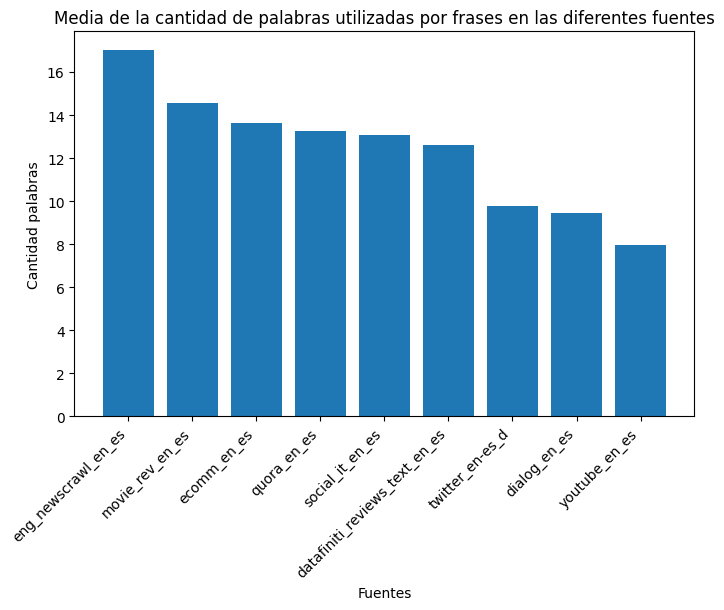

In [47]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Media de la cantidad de palabras utilizadas por frases en las diferentes fuentes')
ax.set_xlabel('Fuentes')
ax.set_ylabel('Cantidad palabras')
ax.bar(df_words_media.index, df_words_media['quantity_words_source'])

plt.xticks(rotation=45, ha='right')
plt.show()

Frecuencia de aparición de sentimiento por tipo de archivos

In [48]:
# Dataframe para cada sentimiento
positive = df.loc[df['sentiment'] == 'positivo']
negative = df.loc[df['sentiment'] == 'negativo']
neutral = df.loc[df['sentiment'] == 'neutral']

In [49]:
# Agrupa por file_name y cuenta cuántas frases tiene cada uno

positive_count = positive.groupby('file_name')[['sentiment']].count()
negative_count = negative.groupby('file_name')[['sentiment']].count()
neutral_count = neutral.groupby('file_name')[['sentiment']].count()

In [50]:
# Obtiene dataframe con los tres sentimientos
df_sentiment = pd.concat([positive_count, negative_count, neutral_count], axis=1)  # 
df_sentiment.columns = ['positive', 'negative', 'neutral']
df_sentiment

,positive,negative,neutral
file_name,,,
datafiniti_reviews_text_en_es,11330,2864,4998
dialog_en_es,40564,18968,39294
ecomm_en_es,2012285,787811,1262942
eng_newscrawl_en_es,162731,73559,184515
movie_rev_en_es,141270,74627,88472
quora_en_es,1465514,619404,1723853
social_it_en_es,76903,22960,36638
twitter_en-es_d,336208,241435,508938
youtube_en_es,35309,16836,78086


In [51]:
df_sentiment.columns

Index(['positive', 'negative', 'neutral'], dtype='object')

In [62]:

# Crear un widgets con los tipos de sentimientos
sentiment = widgets.Dropdown(
    options=["Choose sentiment", 'positive', 'negative', 'neutral'], 
    value='Choose sentiment', 
    description='Sentimiento:',
    disabled=False,  
)
sentiment 

out = widgets.Output()  # Output widget to display the plot
with out:
    display(HTML("<h3>Selecciona el tipo de sentimiento</h3>"))    

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        new_value = change['new']
        with out:
            #out.clear_output()      # Limpiar la salida antes de mostrar el nuevo gráfico
            if not new_value == "Choose sentiment":
                if new_value in df_sentiment.columns:
                    datos = df_sentiment[new_value]
                    trace1 = go.Scatter(
                        x = datos.index,
                        y = datos.values,
                        name = new_value,
                        text = datos.index,
                        mode= 'lines+markers',  
                        marker=dict(symbol='circle', size=8)
                        )

                    data = [trace1]
                
                    layout = go.Layout(
                        title = f'Frecuencia de aparición de sentimiento: {new_value}',
                        xaxis= dict(title= 'Archivo',ticklen= 5, tickangle=45),                       # ticklen es el tamaño de la línea
                        yaxis= dict(title= 'Sentimiento',ticklen= 5),
                    )
                    fig = go.Figure(data=data, layout=layout)
                    display(fig)
                else:
                    print("El valor seleccionado en el widget no coincide con ninguna columna en el DataFrame.")
                
# Enlazar el widget de sentimiento con la función de controlador
sentiment.observe(on_change)

# Mostrar el widget y el gráfico
display(sentiment)
display(out)

Dropdown(description='Sentimiento:', options=('Choose sentiment', 'positive', 'negative', 'neutral'), value='C…

Output()